# Gjevik og Wang Fagerland - Kapittel 3 og 5 

En interaktiv oversettelse

## Bruk av Python

### Innledning

I det følgende har vi oversatt kapittel 3 i boka [Gjevik og Fagerland](https://bibsys-k.alma.exlibrisgroup.com/leganto/readinglist/citation/9752674050002204?institute=47BIBSYS_UBO&auth=SAML) fra Matlab
til Python.  Mens bokas kapittel 3 er skrevet uten å anta at man kan noe om
Matlab fra før, vet vi at dagens typiske student i MEK1100 har forkunnskaper i
Python som går langt forbi den introduksjonen som gis her.  Vi har likevel
prøvd å oversette kapittel 3 i boka forholdsvis *ordrett*.

For grunnleggende introduksjon til Python anbefales læreboka i [IN1900](https://www.uio.no/studier/emner/matnat/ifi/IN1900/h19/ressurser/pensum.html) 
samt [Python-versjonen](https://www.uio.no/studier/emner/matnat/math/MAT1110/v19/appendixpython.pdf) av Matlab-appendikset i læreboka i [MAT1110](https://bibsys-k.alma.exlibrisgroup.com/leganto/readinglist/citation/9848288890002204?institute=47BIBSYS_UBO&auth=SAML). Det er også en elektronisk versjon av
[Matlab-appendikset](https://www.uio.no/studier/emner/matnat/math/MAT1110/v16/fvlabokkort.pdf) i læreboka i MAT1110. Ellers anbefales [NumPy's User Guide](https://numpy.org/devdocs/user/index.html), der [NumPy: the absolute basics for beginners](https://numpy.org/devdocs/user/absolute_beginners.html) er vel verdt å gå igjennom.

Vi skal basere oss på [Matplotlib](https://matplotlib.org/) for å generere grafikk.

For en sammenlikning av visualisering med Matplotlib, Mayavi og Matlab anbefales igjen [Python appendikset til MAT1110](https://www.uio.no/studier/emner/matnat/math/MAT1110/v19/appendixpython.pdf).


## Litt grunnleggende Python

### Oppstart, grensesnitt, kommentarer

På Linux kan du starte Python ved å skrive *python* eller *ipython* i et terminalvindu. Jupyter starter man for eksempel med *jupyter notebook*. Hvis du ikke har installert Jupyter lokalt så finnes det en installert versjon på [https://jupyterhub.uio.no](https://jupyterhub.uio.no). Her kan man logge på med Feide, og man finner en folder som heter `MEK1100` der blant annet denne notebooken ligger. 

Det er andre måter å starte Python som vi ikke diskuterer her.
For å sjekke hvilken versjon av Python man kjører kan man ganske enkelt gjøre som under

In [1]:
import sys
print(sys.version)

3.8.0 | packaged by conda-forge | (default, Nov 22 2019, 19:11:19) 
[Clang 9.0.0 (tags/RELEASE_900/final)]


Boksen over er en interaktiv IPython kode celle. I denne kan man skrive inn Python kode og så kjører man denne ved å trykke på boksen med Run over. Et jupyter-dokument inneholder typisk mange slike bokser, og boksene kan være koblet sammen. Det vil si at kode man beregner i én boks vil kunne regnes som kjent når man kommer lenger ned i dokumentet. Ta et enkelt eksempel

In [2]:
a = 2
b = 3

Skriv litt tekst i mellom her og sjekk så at `a` og `b` lever i boksen under

In [3]:
print(a+b)

5


Stemmer!

Dette med mange forskjellig bokser gjør Jupyter filer litt forskjellig fra vanlige Python programmer.  Faktisk så er Jupyter heller ikke strengt tatt bundet opp mot Python, men virker like bra med andre programmer, som for eksempel MATLAB. Her kommer vi bare til å bruke Python om ikke annet er sagt.

Dersom du ønsker å restarte en beregning midt i et Jupyter document, så kan du slette alle tidligere variable gjennom en [magic-function](https://ipython.readthedocs.io/en/stable/interactive/magics.html)


In [4]:
%reset -f
try:
    print(a+b)
except NameError: 
    print('a og b er ikke definert!')

a og b er ikke definert!


Merk at gjennom magic-funksjonen `%reset -f` så slettes alle variable som har blitt definert opp til nå. Det finnes mange magic-funksjoner. Noen av de viktigste er:

   * `%matplotlib inline`  (For plotting inline med matplotlib)
   * `%load` (laster inn kode fra eksternt skript)
   * `%precision 4` (Setter antall tall etter komma for pretty-printing)
   * `%pwd` (Returnerer present working directory)
   * `%pylab` (Hvis du jobber mye med numpy og matplotlib)
   * `%run` (Kjør en navngitt fil som et program)
   * `%paste` (Paste fra clipboard)

In [5]:
%pwd

'/Users/mikaelmortensen/MySoftware/MEK1100/notebooks'

Når man lager et Jupyter dokument så er koden sannsynligvis godt dokumnetert med alt det man skriver i text-boksene (som denne). I rene Python-filer har man ingen tekst-bokser, så man må lære seg å dokumentere koden sin på annen måte. Linjekommentarer i Python starter med tegnet
`#` og alt fra dette tegnet og ut linja vil oppfattes som kommentar.  Kommentarer over flere linjer er definert ved 3 tegn før og etter kommentaren.

In [6]:
# Dette er en kommentar i Python kode

"""Dette er en kommentar som 
går over
flere 
linjer
"""

'Dette er en kommentar som \ngår over\nflere \nlinjer\n'

Merk at Jupyter oppfatter teksten mellom de to triplequote'ene `"""` som en streng, og spytter den ut som output over. Teksten mellom triplequotes er ganske riktig en streng i Python også, men den skrives ikke ut i et vanlig Python program om man ikke ber om det. Man kan for eksempel gjøre 

In [7]:
s = """Dette er en kommentar som 
går over
flere 
linjer 
og som fanges opp av variabelen `s`
"""

Variabelen `s` kan skrives ut, men ikke automatisk (som default).

In [8]:
print(s)

Dette er en kommentar som 
går over
flere 
linjer 
og som fanges opp av variabelen `s`



# Importere `numpy` for numerikk

Se [NumPy's User Guide](https://numpy.org/devdocs/user/index.html) og spesielt [NumPy: the absolute basics for beginners](https://numpy.org/devdocs/user/absolute_beginners.html) for en god introduksjon til `Numpy`.

Matematiske konstanter og funksjoner som kan ta argumenter som er både
skalarer, lister og arrayer gjøres tilgjengelig fra

In [9]:
import numpy as np
%precision 3
print(np.array((np.pi, np.sin(1))))

[3.142 0.841]


In [10]:
print(np.sin([1, 2]), np.sin(np.array([1, 2])))

[0.841 0.909] [0.841 0.909]


Her merker vi oss at `[1, 2]` er ei liste mens `np.array([1, 2])` er et objekt av type `numpy.ndarray`, sistnevnte er å foretrekke for numerisk arbeid. Merk også at om vi tar bort `np.array` fra den første print statementen, så blir resultatet en tuple

In [11]:
print((np.pi, np.sin(1)))

(3.141592653589793, 0.8414709848078965)


Magic funksjonen `precision` styrer bare output for `numpy`-variabler, så her printes Python objektet `(np.pi, np.sin(1))` som et vanlig tuple. Merk at en tuple er en `immutable` type. Det vil si en type som ikke kan forandres etter at den er skapt:

In [12]:
t = (0, 1, 2)
print(t[2:])
try:
    t[2] = 2
except TypeError:
    print("TypeError - 'tuple' object does not support item assignment")

(2,)
TypeError - 'tuple' object does not support item assignment


# Importere `matplotlib.pyplot` for grafikk

Vi skal bruke `matplotlib.pyplot` for å generere grafikk.  Følgende tre linjer tegner opp ei rett linje mellom punktene (0,1) og (1,2):

<IPython.core.display.Javascript object>


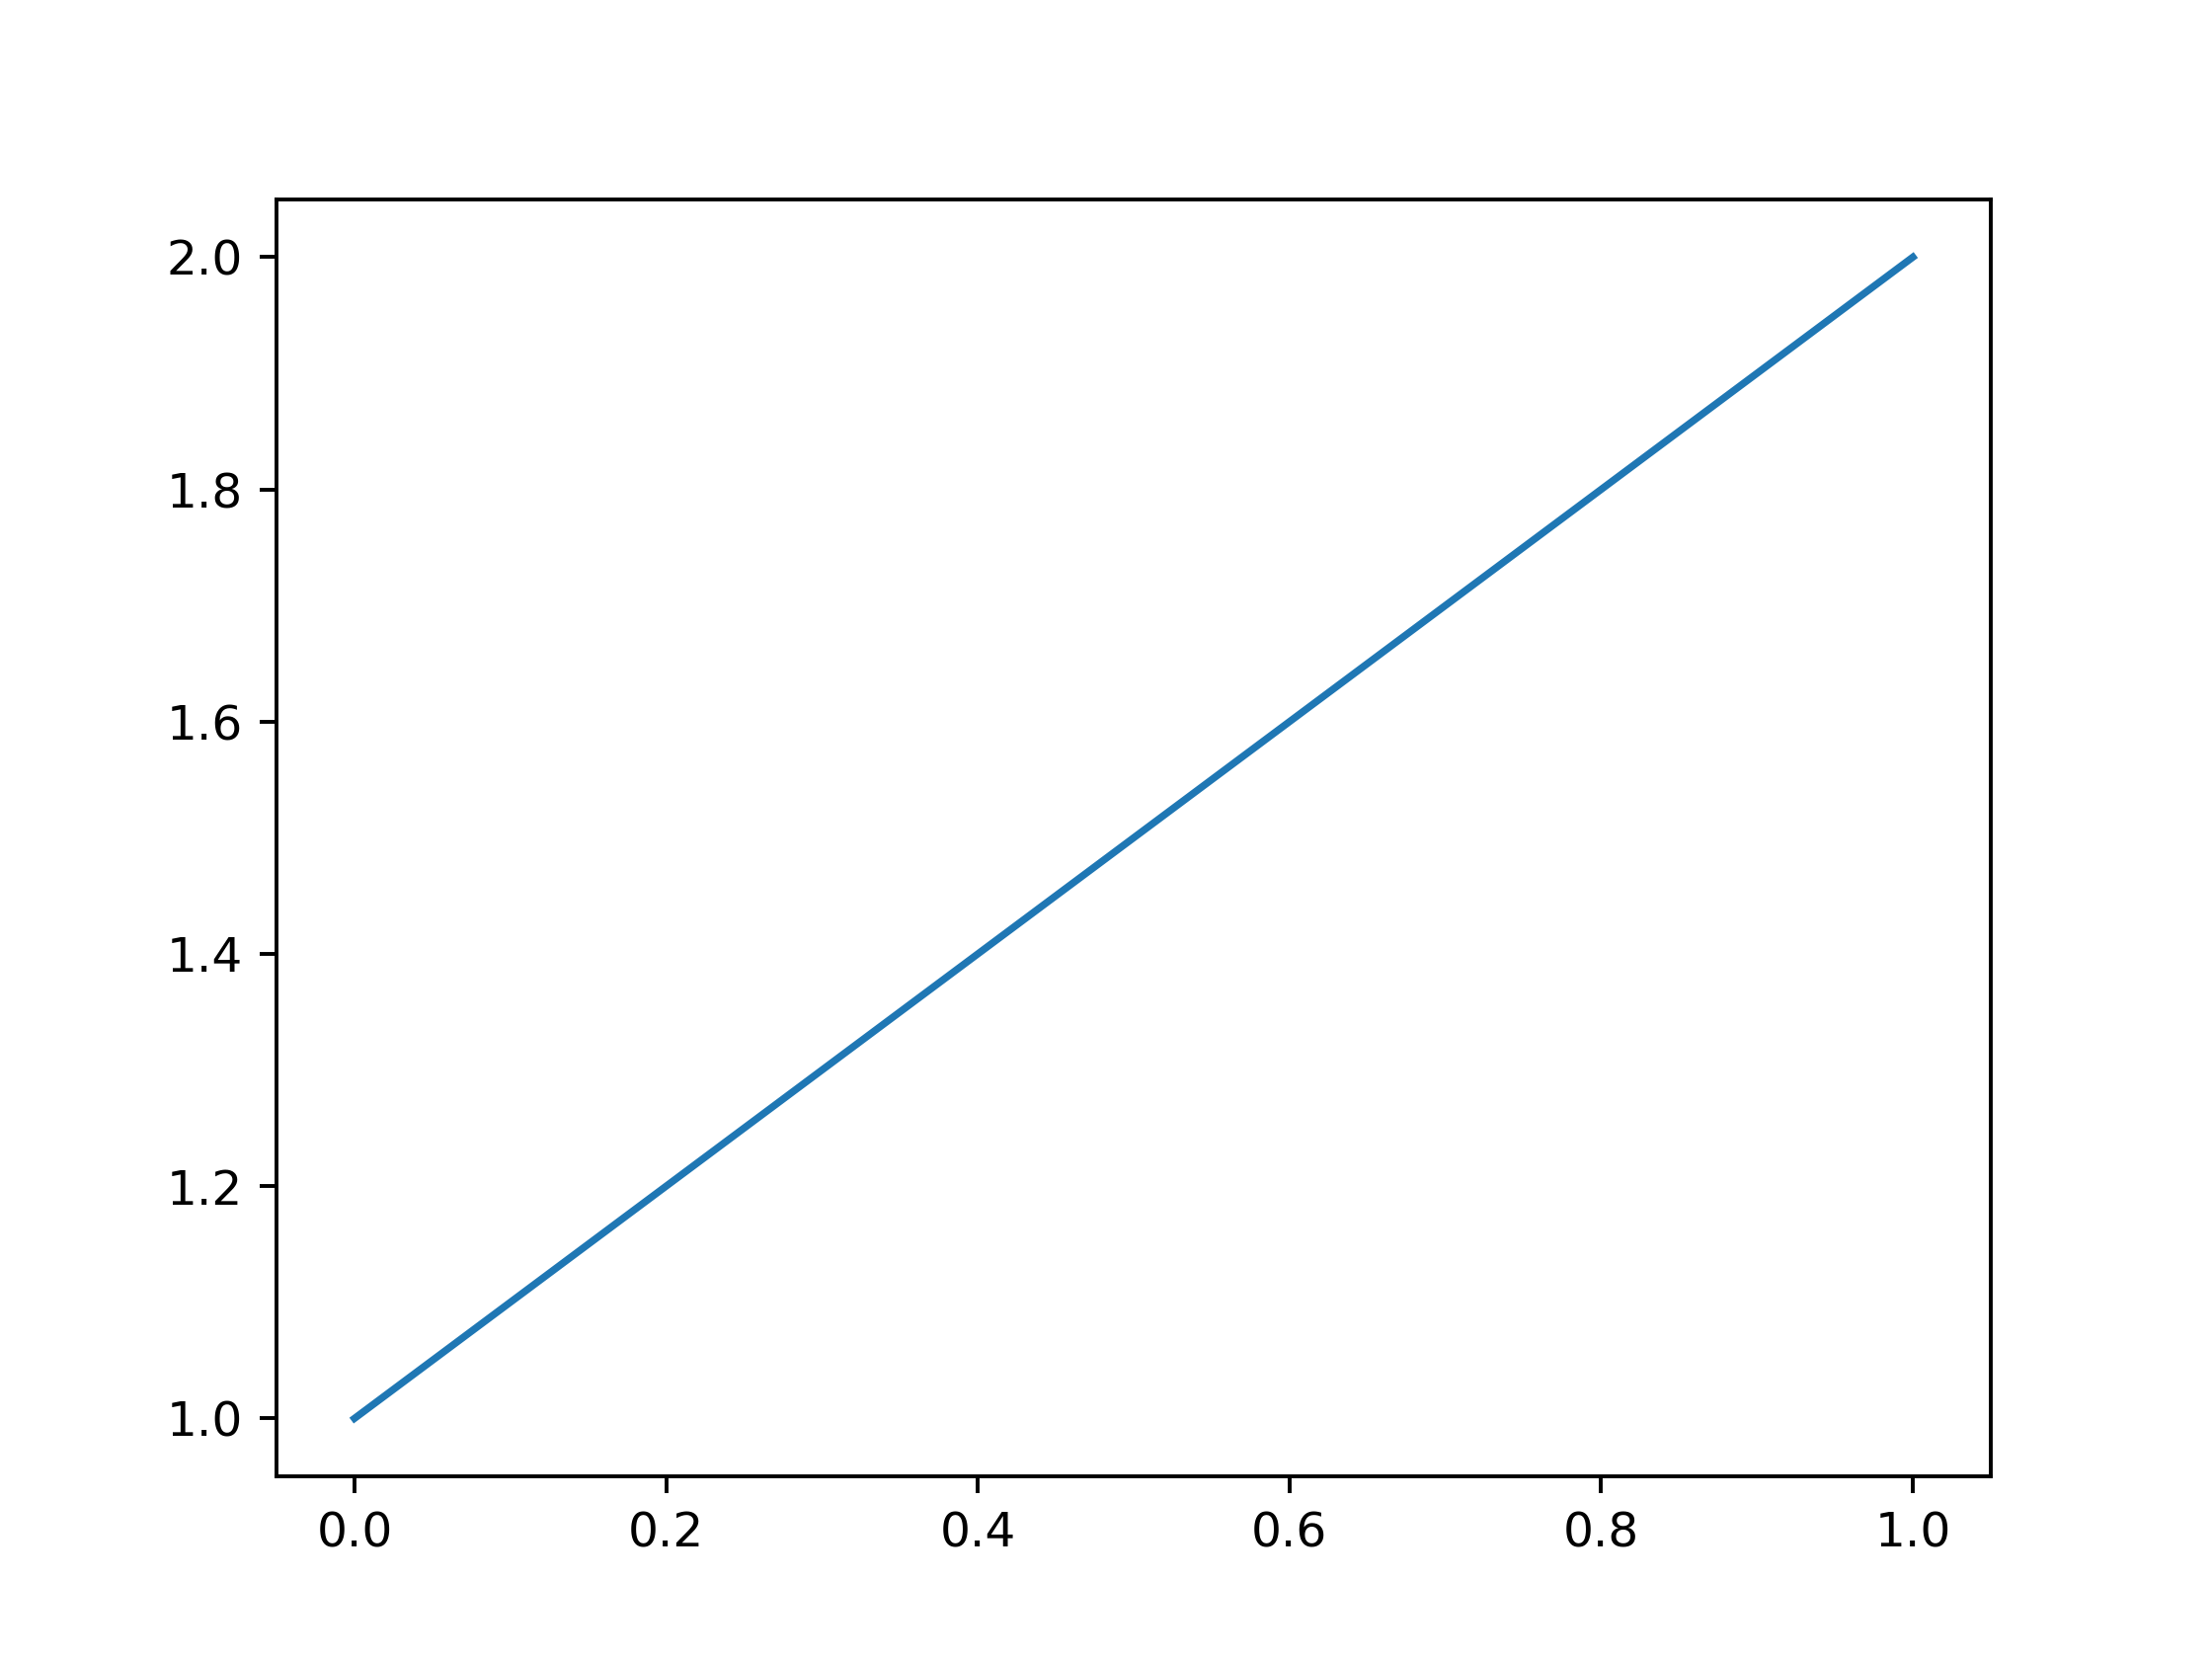

In [83]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot([0, 1], [1, 2])

Merk at figuren er interaktiv siden vi har brukt `%matplotlib notebook`. Man kan få inline plot ved å bruke `%matplotlib inline`. Da vil man ikke kunne gå inn og zoome, eller lagre figuren i etterhånd.

Man kan skru interaktivitet på ved hjelp av `plt.interactive(True)`, og av med `plt.interactive(False)`. Da kan man velge å vente med all plottingen til programmet er ferdig, og så avslutte med kommandoen `plt.show()`, som da vil starte plottingen. Men i Jupyter er det altså mer vanlig å bruke magic functions.

Man kan laste ned figuren ved å trykke på Download-knappen over. Alternativt så kan man bruke `plt.savefig('figurnavn.png')` med et passende figurenavn.

## `pylab`

`pylab` er en modul som tidligere ble mye brukt for å lage et MATLAB-liknende miljø i Python. Gjennom

    from pylab import *

fikk man importert både `matplotlib.pyplot` og `numpy` pluss en del andre funksjoner som hadde akkurat tilsvarende navn i MATLAB. I dag finnes fremdeles `pylab` som en modul i `matplotlib`, men det er ikke lenger anbefalt og modulen ses sjelden i bruk. Istedenfor anbefaler man å bruke

    import matplotlib.pyplot as plt
    import numpy as np

i starten av en modul, og så bruke prefiksene `plt` og `np`. Se for eksempel [denne linken](https://matplotlib.org/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related) for en noe mer utfyllende forklaring.

`matplotlib` var den første gode softwaren i Python for 1D/2D plotting, og den var i lengre tid nesten enerådende. Dessverre gikk hovedutvikleren, [John Hunter](https://en.wikipedia.org/wiki/John_D._Hunter), bort i 2012, og siden den gang har det kommet mange nye programmer på banen. Noen som bør nevnes er

   * [Bokeh](https://docs.bokeh.org/en/latest/index.html)
   * [Plotly](https://plot.ly/python/)
   * [MayaVi](https://docs.enthought.com/mayavi/mayavi/)
   * [Seaborn]()
   

## Bokeh

`Bokeh` er en moderne software som spesielt egner seg for interaktive plot, og plot for web. Man kan generere HTML filer direkte fra `bokeh`. Et eksempel på interaktivt plot er vist under.

In [14]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()
opts = dict(plot_width=250, plot_height=250, min_border=0)

p1 = figure(**opts)
r1 = p1.circle([1,2,3], [4,5,6], size=20)

p2 = figure(**opts)
r2 = p2.circle([1,2,3], [4,5,6], size=20)

t = show(row(p1, p2), notebook_handle=True)

Loading BokehJS ...

Merk at `circle` gir markerplot med dotter. Man kan nå, etterpå, endre på plottene over. Oppdater først venstre plot over ved å bruke `r1`, og sett fargen til hvit.

In [15]:
r1.glyph.fill_color = "white"
push_notebook(handle=t)

Oppdater nå høyre plot til rosa.

In [16]:
r2.glyph.fill_color = "pink"
push_notebook()

Lag et nytt plot

In [17]:
p3 = figure(**opts)
r3 = p3.circle([1,2,3], [4,5,6], size=20)

# get a handle to update the shown cell with
t2 = show(p3, notebook_handle=True)

In [18]:
t2

Merk at `t2` er `handle` for output boksen over. Oppdater nå plot `r3` og plot `r1` med orange farge

In [19]:
r3.glyph.fill_color = "orange"
push_notebook(handle=t2)

In [20]:
r1.glyph.fill_color = "orange"
push_notebook(handle=t)

In [21]:
r2.glyph.fill_color = "red"
push_notebook()

En demo som bruker Bokeh til et interaktivt plot er gitt [her](bokeh-interactive.ipynb)

# Matriser

En matrise kan lages med kommandoen `array` som hører til
Python modulen `numpy`. Objektet som returneres er av type numpy.ndarray, som er å foretrekke framfor vanlige lister for numerisk arbeid.  Elementene separeres med `,` (komma). Hver rad skal
rammes inn med *klammeparenteser* `[]`.  Hele matrisen skal også rammes
inn med klammeparanteser. 

In [22]:
A = np.array([[1, 2 ,3], [4, 5, 6], [7, 8, 9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Det er flere måter å transponere matrisen, for eksempel ved å bruke
kommandoen [transpose](https://numpy.org/devdocs/user/absolute_beginners.html#transposing-and-reshaping-a-matrix)

In [23]:
A.transpose()

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [24]:
np.transpose(A)

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [25]:
A.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

For å finne den inverse til en matrise har vi funksjonen [linalg.inv](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html)

In [26]:
B = np.array([[1, 3, 0], [2, 0, 4], [1, 3, 1]])
B
C = np.linalg.inv(B)
C

array([[ 2.   ,  0.5  , -2.   ],
       [-0.333, -0.167,  0.667],
       [-1.   ,  0.   ,  1.   ]])

Vi sjekker deretter at produktet av matrisene B og C gir enhetsmatrisen

In [27]:
np.dot(C, B)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Funksjonen [diag](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html) returnerer matrisens diagonal.

In [28]:
np.diag(A)

array([1, 5, 9])

Funksjonen [sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html) returnerer summen av alle matriseelementene.

In [29]:
np.sum(A)

45

Med et ekstra argument vil funksjonen [sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html) summere opp kolonnene
eller radene avhengig av verdien til `axis`-parameteren (0=rad, 1=kolonne).

In [30]:
np.sum(A, axis=0)

array([12, 15, 18])

In [31]:
np.sum(A, axis=1)

array([ 6, 15, 24])

Elementet i rad $i$ og kolonne $j$ av $A$ er $A[i,j]$ (husk at i Matlab
starter indekseringen fra 1, mens i Python starter indekseringen fra 0, alle indeksene er derfor redusert med 1 i forhold til Matlab-kapitlet i boka).

In [32]:
A[1, 0] + A[2, 1]

12

In [33]:
A[0, 2] = 0
A

array([[1, 2, 0],
       [4, 5, 6],
       [7, 8, 9]])

Kommandoen [shape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) returnerer antall rader og kolonner til en 
matrise.

In [34]:
np.shape(A)

(3, 3)

Kommandoen [size](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.size.html) returnerer antall elementer i en matrise

In [35]:
np.size(A)

9

Det finnes flere Python-kommandoer som gjør det enkelt å generere
matriser. Vi har sett at funksjonen `diag(A)` returnerer diagonalen
til `A`, men den kan også brukes til å bygge opp en matrise:

In [36]:
A = np.diag([1,2,3])
A

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

Andre nyttige kommandoer som kan nevnes er
[ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html),
[zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html),
[full](https://docs.scipy.org/doc/numpy/reference/generated/numpy.full.html)
og [eye](https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html) som lager matriser med
henholdsvis enere, nuller, en gitt konstant, og identitets-matrisen. Du kan lese mer om dem ved å bruke `help` eller `?`

In [37]:
help(np.zeros)

Help on built-in function zeros in module numpy:

zeros(...)
    zeros(shape, dtype=float, order='C')
    
    Return a new array of given shape and type, filled with zeros.
    
    Parameters
    ----------
    shape : int or tuple of ints
        Shape of the new array, e.g., ``(2, 3)`` or ``2``.
    dtype : data-type, optional
        The desired data-type for the array, e.g., `numpy.int8`.  Default is
        `numpy.float64`.
    order : {'C', 'F'}, optional, default: 'C'
        Whether to store multi-dimensional data in row-major
        (C-style) or column-major (Fortran-style) order in
        memory.
    
    Returns
    -------
    out : ndarray
        Array of zeros with the given shape, dtype, and order.
    
    See Also
    --------
    zeros_like : Return an array of zeros with shape and type of input.
    empty : Return a new uninitialized array.
    ones : Return a new array setting values to one.
    full : Return a new array of given shape filled with value.
    
 

Merk at disse funksjonene for å skape `np.ndarray's` ikke
fungerer helt på samme måte som i Matlab, for eksempel returnerer
`ones(3)` en vektor (`ndarray`) med tre enere, mens `ones((3, 3))`
returnerer en $3\times 3$ matrise fylt med enere.

### Matematiske operasjoner på arrayer

De matematiske funksjonene i `numpy` kan operere komponentvis på
arrayer

In [38]:
A = np.array([[1, 2]])
np.sin(A)

array([[0.841, 0.909]])

## Kolon-operatoren, arange og linspace

For å generere en vektor med heltallige verdier fra en aritmetisk tallfølge kan vi bruke [arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html).  For eksempel, en vektor (tallrekke) fra $-5$ til 5 med intervall 1

In [39]:
np.arange(-5, 6)

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

Det genereres tall større eller lik første argument, og mindre enn andre
argument.  En vektor fra $-15$ til 15 med intervall 3

In [40]:
np.arange(-15, 16, 3)

array([-15, -12,  -9,  -6,  -3,   0,   3,   6,   9,  12,  15])

For ikke-heltallige verdier anbefales det å bruke
[linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) for å unngå avrundingsfeil, `linspace` genererer det antall tall som angitt ved tredje argument, jevnt fordelt fra og med første og til og med andre argument

In [41]:
np.linspace(-15, 15, 11)

array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.])

Det finnes en annen kommando [range](https://docs.python.org/3/library/functions.html#func-range) som fungerer tilsynelatende
likt som `arange` for heltallige
argumenter, men mens `arange`
genererer objekter av type numpy.ndarray så gir `range` et objekt som kan generere en liste med heltall. 

In [42]:
r = range(4)
ar = np.arange(4)
print(r)
print(ar)

range(0, 4)
[0 1 2 3]


Man kan få en liste fra `range` ved å bruke `list`

In [43]:
list(r)

[0, 1, 2, 3]

`range` brukes ofte når man trenger å loope et visst antall ganger og den er effektiv, ikke minst i minnebruk, siden den faktisk ikke lager hele listen med tall. Den genererer bare nye tall.

In [44]:
for i in range(3):
    print(i)

0
1
2


Merk at lister ikke anbefales for numerisk arbeid da de er trege, det går langsomt å loope over lister.

In [45]:
A = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

I Python kan kolon-operatoren `:`
brukes til å indeksere matriser og vektorer på en effektiv (vektorisert) måte. Se [slice](https://docs.python.org/3/library/functions.html#slice).

Print de to midterste radene av `A`

In [46]:
A[1:3, :]

array([[ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

Merk at den andre kolonen er valgfri. Her kunne vi også ha brukt

In [47]:
A[1:-1]

array([[ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

der `1:-1` leses som fra rad 1 til nest siste (-1). Kolon-operatoren bruker `slice`-objekter, men har en finere syntaks. Det ville vært det samme som over om vi brukte `slice`-objektet direkte

In [48]:
A[slice(1, -1)]

array([[ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

Men vi holder oss vanligvis til å bruke kolon-operatoren.

Første til tredje rad, andre til fjerde kolonne

In [49]:
A[:3, 1:4]

array([[ 2,  3,  4],
       [ 6,  7,  8],
       [10, 11, 12]])

Eventuelt samme sak

In [50]:
A[:-1, 1:]

array([[ 2,  3,  4],
       [ 6,  7,  8],
       [10, 11, 12]])

Steglengde 2 langs kolonnene

In [51]:
print (A[1:3, 1:4:2])

[[ 6  8]
 [10 12]]


Steglengde 3 langs kolonnene

In [52]:
print(A[1:3, :4:3])

[[ 5  8]
 [ 9 12]]


Det er også mulig å kun oppgi steglengde

In [53]:
print(A[::3, ::2])

[[ 1  3]
 [13 15]]


Det burde nå være åpenbart at kolon-operatoren fungerer på dramatisk
forskjellig måte i Matlab og Python!  En viktig forskjell er at steglengden i Python angis med siste tall, mens steglengden i Matlab angis med midterste tall.

## py-filer og funksjoner

Isteden for å taste inn kommandoer i terminal-vinduet kan vi samle kommandoer i ei fil ved hjelp av en teksteditor og så kjøre fila i Python. Her antar vi
at fila slutter på `.py` og kalles derfor ei *py-fil*.

Vi kan lage en text-fil med kommandoer som definerer en matrise $A$ og skriver ut noen egenskaper til matrisen:

In [54]:
s = """
import numpy as np
A = np.array([[1,3,0],[2,1,1]])
print(A)
print(A.size)
print(A.shape)
print(np.diag(A))
print(np.sum(A))
print(A.transpose())"""
f = open('MatriseEksempel.py', 'w')
f.write(s)
f.close()

Fila `MatriseEksempel.py` er nå en vanlig *py-fil*, og vi kan kjøre den med å kalle `python MatriseEksempel.py`, eller i `Jupyter/IPython` som under med å bruke `%run` magic-funksjonen

In [55]:
run MatriseEksempel.py

[[1 3 0]
 [2 1 1]]
6
(2, 3)
[1 1]
8
[[1 2]
 [3 1]
 [0 1]]


Under følger et eksempel på hvordan vi kan definere en funksjon som vi legger i en fil ved navn `tridiag.py`:

In [56]:
s = r"""
import numpy as np
from scipy.sparse import diags

def tridiag(n):
    '''Konstruerer en nxn matrise med -2 på
    diagonalen og 1 på de to subdiagonalene'''
    # To alternative måter vist under. Den som bruke `diags`
    # er mest effektiv
    
    #A = -2*np.eye(n) + np.diag(np.ones(n-1), 1) + np.diag(np.ones(n-1), -1)
    A = diags((1, -2, 1), (-1, 0, 1), shape=(n, n)).todense()
    return A
"""
f = open('tridiag.py', 'w')
f.write(s)
f.close()

    Merk: Vanligvis vil man bruke en text-editor for å lage en sånn fil. Gode eksempler på text-editorer for Python er [Visual Studio Code](https://code.visualstudio.com), [Spyder](https://www.spyder-ide.org) og [Kate](https://kate-editor.org).

Linja som starter med `def` forteller
Python at dette er en funksjon som heter `tridiag` og tar en innparameter
($n$).  De to neste linjene er en kort beskrivelse av funksjonen. Denne
hjelpeteksten (`docstring`) er alltid lurt å ta med ettersom det er denne teksten som `help` bruker for å beskrive
funksjonen.
Etter hjelpeteksten har forfatteren lagt inn et par kommentarer i koden. Dette er kodelinjene som starter med `#`, og de vil ikke kjøres når man kaller på funksjonen. Det er her vist to måter å lage samme matrise på. Den første metoden lager tre matriser og summerer de, hvilket betyr masse ekstra og unødvendig arbeid siden matrisene kun har én diagonal hver og masse nuller. Den andre metoden bruke modulen [scipy](https://scipy.org), som inneholder mange nyttige funksjoner. En av disse er [diags](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.diags.html#scipy.sparse.diags), som kan brukes til å lage matriser med gitte diagonaler. Funksjonen `tridiag` lager matrisen $A$ og returnerer den.
Funksjonen kan nå importeres:

In [57]:
from tridiag import *

Brukerveiledning fås med:

In [58]:
help(tridiag)

Help on function tridiag in module tridiag:

tridiag(n)
    Konstruerer en nxn matrise med -2 på
    diagonalen og 1 på de to subdiagonalene



Funksjonen kalles opp slik:

In [59]:
tridiag(5)

matrix([[-2.,  1.,  0.,  0.,  0.],
        [ 1., -2.,  1.,  0.,  0.],
        [ 0.,  1., -2.,  1.,  0.],
        [ 0.,  0.,  1., -2.,  1.],
        [ 0.,  0.,  0.,  1., -2.]])

## Enkel plotting i 2D

Kommandoen `plt.plot` kan brukes til
enkel plotting i én dimensjon. La oss først plotte funksjonen $y = x^3$ der $x$ er definert over et område fra $-2\pi$ til $2\pi$:

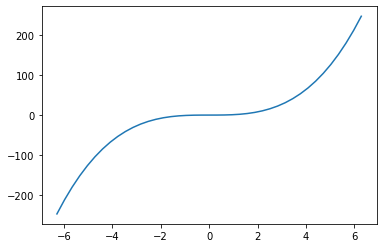

In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-2*np.pi, 2*np.pi, 41)
y = x**3
plt.plot(x, y)
plt.show()

Her har vi valgt å diskretisere $x$-intervallet med 41 punkt som gir steg på $\pi/10$.  Velges dette steget for stort blir grafen hakkete. Prøv f.eks. med et steg på $\pi/2$.

Vi kan også enkelt plotte en kurve som er gitt ved en parametrisering. En 
sirkel med radius $r$ kan uttrykkes ved $x(t) = r\cos t $, $y(t) = 
r\sin t $ der $t$ går fra 0 til $2\pi$. La oss plotte en sirkel med radius $3$:

(-3.3, 3.3, -3.3, 3.3)

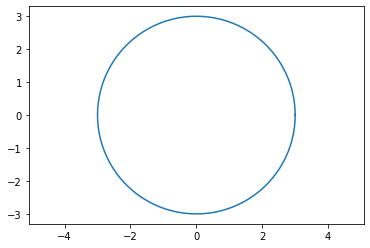

In [61]:
r = 3
t = np.linspace(0, 2*np.pi, 101)
x = r*np.cos(t)
y = r*np.sin(t)
plt.plot(x, y)
plt.axis("equal")

For at sirkelen skal se ut som en sirkel og ikke som en ellipse, så er
det et viktig poeng at en enhet langs $x$-aksen er like lang som en
enhet langs $y$-aksen.  Dette oppnås med kommandoen
`plt.axis("equal")`.Prøv å
utføre kommandosekvensen ovenfor uten å kalle `plt.axis("equal")`
og se at figuren da ser ut som en ellipse!

## Elementvise operasjoner

Noen operasjoner (f.eks. multiplikasjon, divisjon og potens) kan man ønske å bruke på matriser på to forskjellige matematiske måter. Når variablene disse operasjonene virker på er skalarer, vil den vanlige betydningen (multiplikasjon, divisjon og potens) gjelde slik at f.eks. `3*2` vil gi det forventede svaret 6. Hvis derimot variablene er enten vektorer eller matriser, kan vi ønske at operasjonene enten er vanlige matriseoperasjoner eller elementvise operasjoner.  **Matlab og Python oppfører seg ikke likt!** I Matlab betyr `*`, `/`, `**` og
`|^|` matriseoperasjoner (de to siste er synonymer for potens), mens
man ved å tilføye et `.`  foran operatorene får elementvise
operasjoner.  I Python betyr `*`, `/` og
`**` elementvise operasjoner (`**` betyr potens, mens derimot `|^|` betyr noe helt annet). I eksempelet over der vi ønsker å
regne ut $y = x^3$, og vi allerede har definert en vektor med $x$-verdier,
vil vi at hvert element i $x$ skal opphøyes i tredje; vi ønsker ikke å bruke matrisemultiplikasjonen av $x$ med seg selv to ganger.  Noen eksempler:

In [62]:
a = np.arange(1,5)
a

array([1, 2, 3, 4])

In [63]:
3*a

array([ 3,  6,  9, 12])

In [64]:
a*a

array([ 1,  4,  9, 16])

Indreprodukt beregnes med [dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)

In [65]:
np.dot(a, a)

30

Ytre eller dyadisk produkt beregnes med `outer`

In [66]:
np.outer(a, a)

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16]])

Ta en titt i boka for å finne ut hvordan disse operasjonene gjøres i Matlab!

# Plotting av flater

Vi skal nå se på hvordan vi kan lage plottet av flaten i figur 1.7 i boka. Flaten er gitt matematisk ved formelen:

$$
\begin{equation}
  \label{eq:fjelltopp}
  h = \frac{h_0}{1 + \frac{x^2 + y^2}{R^2}}.
\end{equation}
$$

Formelen modellerer en isolert fjelltopp, vulkanen Beerenberg på Jan Mayen, se fotografi i figur 1.8 i boka, der $h$ er høyden over havflaten, $h_0$ er høyden på toppen av fjellet og $R$ er et mål for radius i fjellet. Konstantene $h_0$ og $R$ er her satt til $2277\,$m og $4000\,$m.

<img src='berenberg_overflate.png' id='fig:berenberg'></img>

Det første vi skal gjøre er å definere de to konstantene $h_0$
og $R$. Vi ser av figuren at $x$- og $y$-aksen er oppgitt i km
og $h$-aksen i meter. Vi definerer derfor $h_0$ i meter og $R$
i km:

In [67]:
h0 = 2277.
R = 4.

$x$- og $y$-aksen skal spenne over et område på $20\times20$ km med sentrum i origo. For å lage et passende grid med $x$- og $y$-verdier kan vi bruke kommandoen [meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) som tar to vektorer som parametere. Vektorene vi bruker som innparametere kan vi lage ved å bruke `linspace`:

In [68]:
t = np.linspace(-10, 10, 41)
x, y = np.meshgrid(t, t, indexing="ij")

Størrelsen på gridet må tilpasses hvert eksempel. Her har vi brukt 41 punkter per akse, noe som gir en passende maskestørrelse samtidig som flaten ser glatt ut.

Merk at `meshgrid` må
angis med opsjon `indexing="ij"` for at etterfølgende
operasjoner skal fungere korrekt: Merk at 2D grid kan organiseres på to måter: Kartesisk indeksering (standard `meshgrid` i `numpy` og i `Matlab`), eller matrise-indeksering(`meshgrid` med `indexing="ij"` i
`numpy`, `ndgrid` i `Matlab`).  Kommandoen `gradient` (se
[kapittel](#Plotting-av-vektorfelt-og-beregning-av-gradient-vektor)) ønsker kartesisk indeksering i Matlab og
matrise-indeksering i Python.

Vi er nå klare til å regne ut $h$:

In [69]:
h = h0/(1 + (x**2+y**2)/(R**2))

For å tegne opp 3D grafikk skal vi bruke  Matplotlib [mplot3d
toolkit](http://matplotlib.org/mpl\_toolkits/mplot3d/). For
å komme i gang kan vi først gjøre følgende:

In [70]:
from mpl_toolkits.mplot3d import axes3d

Deretter kan vi be om å få tegnet opp omtrent som Matlab `surf`

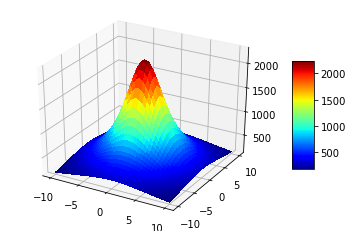

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(x, y, h, rstride=1, cstride=1, cmap=plt.cm.jet,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

eller omtrent som Matlab `mesh` med skyggevirkning

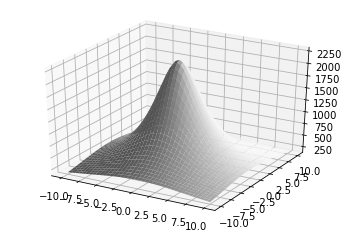

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, h, rstride=1, cstride=1, color="w", linewidth=0.1)

eller vi kan lage kurver som ikke har skyggevirkning

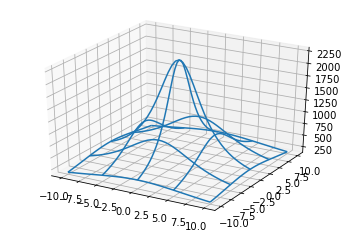

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(x, y, h, rstride=10, cstride=10)

For å endre fargene som skriv `cmap=plt.cm.MAP` hvor
`MAP` er et gyldig navn på colormap, for eksempel `jet`,
`hot`, `bone`, `cool`, etc., dette står forklart
i [seksjonen om konturlinjer](#Plotting-av-konturlinjer).

For å se hvilke farger som representerer hvilke verdier kan man skrive
`colorbar()`, men det er
selvfølgelig kun meningsfullt ved bruk av tilsvarende colormap.

Til slutt kan vi pynte litt på figuren. For å angi navn på aksene 
bruker vi `set_xlabel, set_ylabel, set_zlabel`

In [74]:
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("h")

Text(0.09379629152477455, 0.012566320283548626, 'h')

# Plotting av konturlinjer

Vi skal ta for oss et nytt eksempel fra
kapittel 1, side 10; lufttrykket ved havflaten i tilknytning til et stormsenter. Formelen vi skal
bruke er gitt ved 

$$
\begin{equation}
  \label{eq:lufttrykk_stormsenter}
  p = p_0 - \frac{\Delta p}{1 + \frac{x^2 + y^2}{R^2}}
\end{equation}
$$

der $p_0$ er lufttrykket langt borte fra sentrum, $\Delta p$ er
trykkfallet inn mot sentrum og $R$ er et mål for utstrekningen av
lavtrykket. Konturlinjene vi
skal plotte er gjengitt i figurene under.

<img src='lufttrykk_contour.png' width=300>
<img src='lufttrykk_pcolor.png' width=300>

Vi starter med konstantene som skal oppgis i km ($R$) og hPa ($p_0$ og
$\Delta p$):

In [75]:
R = 50
p0 = 1000
dp = 40

Til forskjell fra boka skal vi her la $x$-aksen være definert over et
område fra $-150$ til 0 km, mens vi lar $y$-aksen være definert over et område fra 0 til 150 km, deretter regnes $p$-verdiene ut:

In [76]:
tx = np.linspace(-150, 0, 151)
ty = np.linspace(0, 150, 151)
x,y = np.meshgrid(tx, ty, indexing="ij")
p = p0 - dp/(1+(x**2+y**2)/R**2)

Konturlinjene kan nå plottes med kommandoen `contour`:

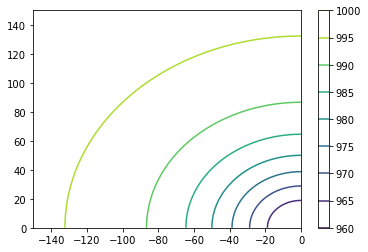

In [77]:
plt.contour(x, y, p)
plt.colorbar()

For å plotte et valgfritt antall konturlinjer bruk `contour(x, y, p, n)`
der $n$ er antall linjer.  Hvis vi kun er interessert i noen utvalgte
trykkverdier (f.eks. 960, 970, 980 og 990) så kan vi gi verdiene som en
vektor til `contour`:

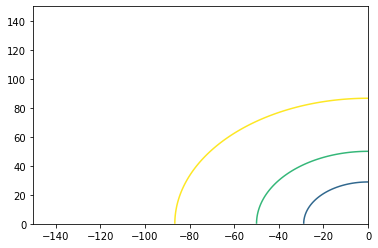

In [78]:
v = [960, 970, 980, 990]
plt.contour(x, y, p, v)

eller enda enklere: `plt.contour(x, y, p, [960, 970, 980, 990])`.

Vil du bruke en annen fargeskala prøv `cmap=plt.cm.MAP` hvor `MAP` er et gyldig navn for en [colormap](https://matplotlib.org/tutorials/colors/colormaps.html)

For å se hvilke verdier linjene har kan man skrive eksplisitt på hver linje, og linjene bør da ha en mørk farge.  Man kan benytte kommandoen
`clabel` som vist nedenfor til
å skrive på verdiene i plottet (legg merke til variabelen `C` som
brukes til å overføre informasjon fra `contour` til `clabel`).

For en alternativ type plott som inneholder samme informasjon, prøv å bytte ut linjene med `contour` og `clabel` med
`pcolor` og `colorbar`:

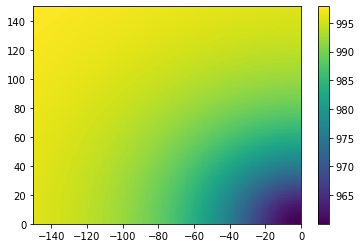

In [79]:
plt.pcolor(x, y, p)
plt.colorbar()

# Plotting av vektorfelt og beregning av gradient-vektor

Et vektorfelt i kartesiske koordinater $\vec{v} = v_x(x,y)\mathbf{i} + 
v_y(x,y)\mathbf{j}$ kan plottes med 

    plt.quiver(x, y, vx, vy, [faktor], [farge])

der `faktor` og `farge` er valgfrie opsjoner som endrer 
henholdsvis vektorenes lengde med en skaleringsfaktor og vektorenes farge. La oss ta et eksempel:

$$
\begin{equation}
  \vec{v} = (x^2 + 2y - \frac{1}{2}xy)\mathbf{i} - 3y\mathbf{j}.
\end{equation}
$$

Vi lar $x$ og $y$ variere mellom $-5$ og 5. Når vi skal definere et 
grid for $x$ og $y$, må vi passe på å bruke et større intervallsteg enn vi  vil bruke for overflateplott eller konturlinjer. Det blir fort 
uryddig med for mange vektorer i en og samme figur.

(-5.5, 5.5, -5.5, 5.5)

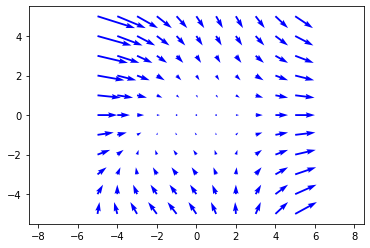

In [80]:
t = np.linspace(-5, 5, 11)
x,y = np.meshgrid(t, t, indexing="ij")
vx = x**2 + 2*y - .5*x*y
vy = -3*y
plt.quiver(x, y, vx, vy, scale=25, units="x", color="b") # skalareringsfaktor, blaa farge
plt.axis("equal")

Her har vi skalert lengden til alle vektorene med en faktor 25
relativt til $x$-aksen som referanse, og vi har bedt om at vektorene
skal tegnes i blå farge. (NB! I Matlab og i Octave øker
  pilenes lengde med skaleringsfaktor.  I Python/Matplotlib avtar
  pilenes lengde med skaleringsfaktor.)

Hvis vi har definert et skalarfelt $F(x, y)$ over et område utspent av
vektorene $x$ og $y$ i Python kan vi regne ut gradientvektoren til
feltet med `gradient(F)`. Denne funksjonen returnerer de partielt
deriverte ($\partial F/\partial x$ og $\partial F/\partial y$ i 2D) til
feltet.

    Merk at dersom `gradient(F)` kalles med kun ett argument antas det at avstanden mellom gridpunktene er lik én. Dersom avstanden er ulik én, men konstant lik $H$ (en skalar) i alle retninger kan skrive `gradient(F, H)`.  Dersom avstanden mellom gridpunkter er konstant lik `HX` i $x$-retning og konstant lik `HY` i $y$-retning kan man skrive `gradient(F, HX, HY)`. Med disse for hånden kan vi plotte vektorfeltet med `quiver`:

    dFx, dFy = np.gradient(F)
    plt.quiver(x, y, dFx, dFy)

Vi har nå det som trengs for å plotte konturlinjer for
$h$ med gradientvektoren $\nabla h$.

Samler vi alle kommandoene kan det nå se slik ut:

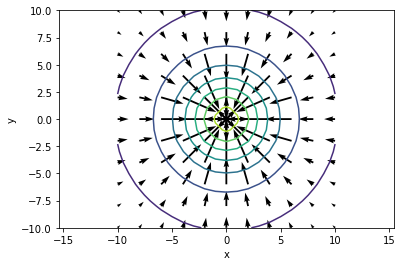

In [81]:
h0 = 2277  # Hoyden av toppen av fjellet (m)
R = 4      # Maal for radius av fjellet (km)
tt = np.linspace(-10.,10.,11)
xx, yy = np.meshgrid(tt, tt, indexing="ij") # Definer et grovere grid til vektorfelt
hh = h0/(1+(xx**2+yy**2)/(R**2)) # Beregn hoyden med det nye griddet
dhx, dhy = np.gradient(hh, 2.0)      # Beregn gradientvektoren (dh/dx,dh/dy)
# andre argument 2.0 er avstanden mellom gridpunktene i x- og y-retning
plt.quiver(xx, yy, dhx, dhy)         # Plott vektorfeltet
t = np.linspace(-10., 10., 21)
x, y = np.meshgrid(t, t, indexing="ij")  # Grid for x- og y-verdiene (km)
h = h0/(1+(x**2+y**2)/(R**2)) # Beregn hoyden h (m)
plt.contour(x, y, h)                # Kontur og sett akseenhetene like
plt.xlabel("x")                   # Sett aksenavn
plt.ylabel("y")
plt.axis("equal")                 # Sett akseenhetene like
plt.show()

    Merk: I denne figuren er det et viktig poeng at pilene skal stå vinkelrett på sirklene.  Dette oppnår man ved å kreve at enhetene langs begge aksene er like, derfor er det viktig å ta med kommandoen `axis("equal")`.

    Merk: Prøv å kjøre skriptet ovenfor uten å ta med de to forekomstene av `indexing="ij"` og legg merke til at figuren da blir helt feil!

# Plotting av strømlinjer

I kapittel 4 møter vi strømfunksjonen $\psi$.
Kjenner vi uttrykket for denne er det lett å plotte
strømlinjene. Siden strømfunksjonen er konstant langs en strømlinje
vil strøm-linjene være konturlinjer for skalarfeltet 
$\psi$. Vi kan derfor definere et grid i $x$- og $y$-retning med
`meshgrid`, regne ut diskrete verdier av strømfunksjonen, og til slutt bruke `contour` for å tegne opp strømlinjene, akkurat på samme måte som vi plottet isobarene til trykkfeltet i seksjonen for [Plotting av kontourlinjer](#Plotting-av-konturlinjer).

    Merk: Noen ganger ønsker vi å plotte strømliner og ekviskalarflater i samme plott.  I så fall er det et viktig poeng at de to kurvefamiliene står vinkelrett på hverandre.  Dette oppnås ved å kreve at enhetene langs begge aksene er like, derfor er det viktig å ta med kommandoen `axis("equal")`.

# Oppgaver

Oppgavene som står i boka anbefales og kan gjøres uansett om man bruker
Matlab eller Python.

# En praktisk anvendelse av $\nabla$-operatoren i meteorologi

Vi presenterer kun forslag til:


## 5. 8 En fil med hele Python-koden

(31, 30)
(31, 30)
(31, 30)
max vindhastighet  37.88597782821502


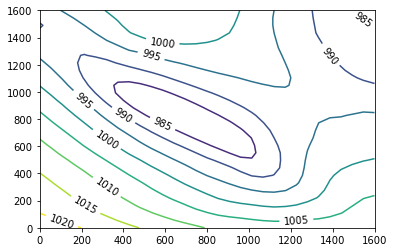

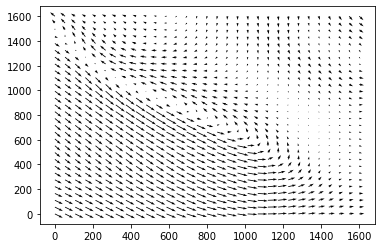

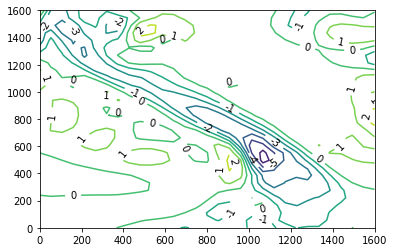

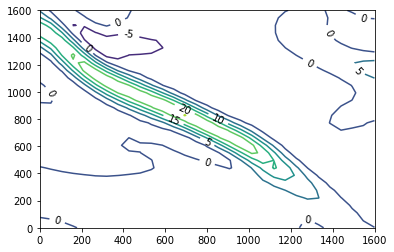

In [82]:
import numpy as np 
import pylab as plt

# transpose nedenfor tilpasser datasett som var lagret for bruk i Matlab
# slik at de kan brukes i Python

p = np.transpose(np.loadtxt('meteorologi/trykkfelt.dat'))
u = np.transpose(np.loadtxt('meteorologi/vindfelt_u.dat'))
v = np.transpose(np.loadtxt('meteorologi/vindfelt_v.dat'))

print(p.shape)
print(u.shape)
print(v.shape)

Nx, Ny = p.shape

isobarer = np.arange(980, 1025, 5)
x = np.linspace(0,1600,Nx)
y = np.linspace(0,1600,Ny)
xx, yy = np.meshgrid(x, y, indexing='ij')
CS = plt.contour(xx, yy, p, isobarer)
plt.clabel(CS, inline=1, fontsize=10, fmt='%1.0f', colors='k')

plt.figure()
plt.quiver(xx, yy, u, v)

l = np.sqrt(u**2 + v**2)
l_max = l.max()
print('max vindhastighet ', l_max)

dudx = np.gradient(u, axis=0)
dvdy = np.gradient(v, axis=1)
div = dudx + dvdy
plt.figure()
isobarer = np.array([-9, -4, -3, -2, -1, 0, 1, 2])
CS = plt.contour(xx, yy, div, 10)
plt.clabel(CS, inline=1, fontsize=10, fmt='%1.0f', colors='k')

dudy = np.gradient(u, axis=1)
dvdx = np.gradient(v, axis=0)
curlz = dvdx - dudy
plt.figure()
CS = plt.contour(xx,yy,curlz)
plt.clabel(CS, inline=1, fontsize=10, fmt='%1.0f', colors='k')
plt.show()